In [1]:
#Classification of Muffin and Cupcake


In [19]:
#required packages

import numpy as np
import pandas as pd

from sklearn import svm


import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [20]:
#import our data to nb
recipes =pd.read_csv(r'C:\Users\Gideon\Desktop\DS\Machine Learning Full Course-20210918T154820Z-001\Machine Learning Full Course\Machine Learning Full\Machine Learning Tutorial Part 1 _ 2\Cupcakes vs Muffins.csv')

In [21]:
print(recipes.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


C:\Users\Gideon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


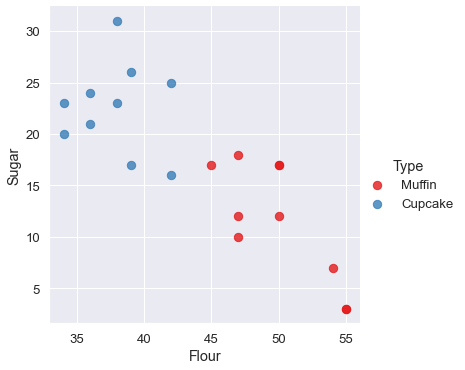

In [22]:
#plot the data using seaborn
sns.lmplot('Flour','Sugar',data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})

In [32]:
#data preprocessing

type_label = np.where(recipes['Type']=='Muffin',0,1)
recipe_features=recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [33]:
ingredients=recipes[['Flour','Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [34]:
model=svm.SVC(kernel='linear')
model.fit(ingredients,type_label)

SVC(kernel='linear')

In [35]:
#separaring hyperplane

w=model.coef_[0]
a=-w[0]/w[1]

xx=np.linspace(30,60)

yy=a*xx-(model.intercept_[0]/w[1])

print(yy)
##ploting parallels separating hyperplane to pass through support vectors

b=model.support_vectors_[0]
yy_down=a*xx+(b[1]-a*b[0])
b=model.support_vectors_[-1]
yy_up=a*xx+(b[1]-a*b[0])

[ 1.15779472e+16  1.10528750e+16  1.05278028e+16  1.00027306e+16
  9.47765844e+15  8.95258624e+15  8.42751405e+15  7.90244185e+15
  7.37736965e+15  6.85229746e+15  6.32722526e+15  5.80215306e+15
  5.27708087e+15  4.75200867e+15  4.22693647e+15  3.70186428e+15
  3.17679208e+15  2.65171988e+15  2.12664769e+15  1.60157549e+15
  1.07650329e+15  5.51431096e+14  2.63588995e+13 -4.98713297e+14
 -1.02378549e+15 -1.54885769e+15 -2.07392989e+15 -2.59900208e+15
 -3.12407428e+15 -3.64914648e+15 -4.17421867e+15 -4.69929087e+15
 -5.22436307e+15 -5.74943526e+15 -6.27450746e+15 -6.79957966e+15
 -7.32465185e+15 -7.84972405e+15 -8.37479625e+15 -8.89986844e+15
 -9.42494064e+15 -9.95001284e+15 -1.04750850e+16 -1.10001572e+16
 -1.15252294e+16 -1.20503016e+16 -1.25753738e+16 -1.31004460e+16
 -1.36255182e+16 -1.41505904e+16]


C:\Users\Gideon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


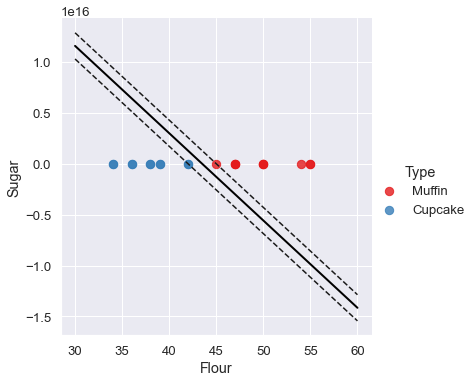

In [39]:
sns.lmplot('Flour','Sugar',data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2, color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')

In [46]:
#function creation for muffin and cupcake pred

def muffin_or_cupcake(flour,sugar):
 if(model.predict([[flour,sugar]]))==0:
    print("Muffin!!")
 else:
    print("Cupcake")

#prediction aspect

muffin_or_cupcake(1200,900)

Muffin!!


C:\Users\Gideon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


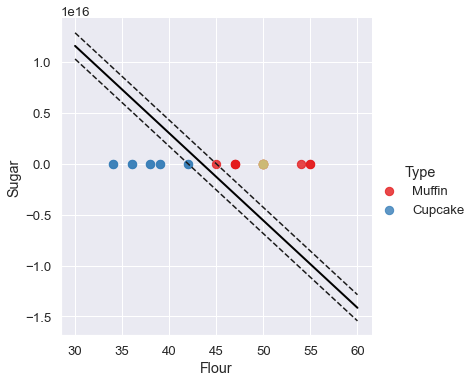

In [48]:
sns.lmplot('Flour','Sugar',data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2, color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')
plt.plot(50,20,'yo',markersize='9')